In [316]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
sns.set()
dataset = pd.read_csv('./Datasets/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [317]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [318]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [319]:
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [320]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [321]:
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


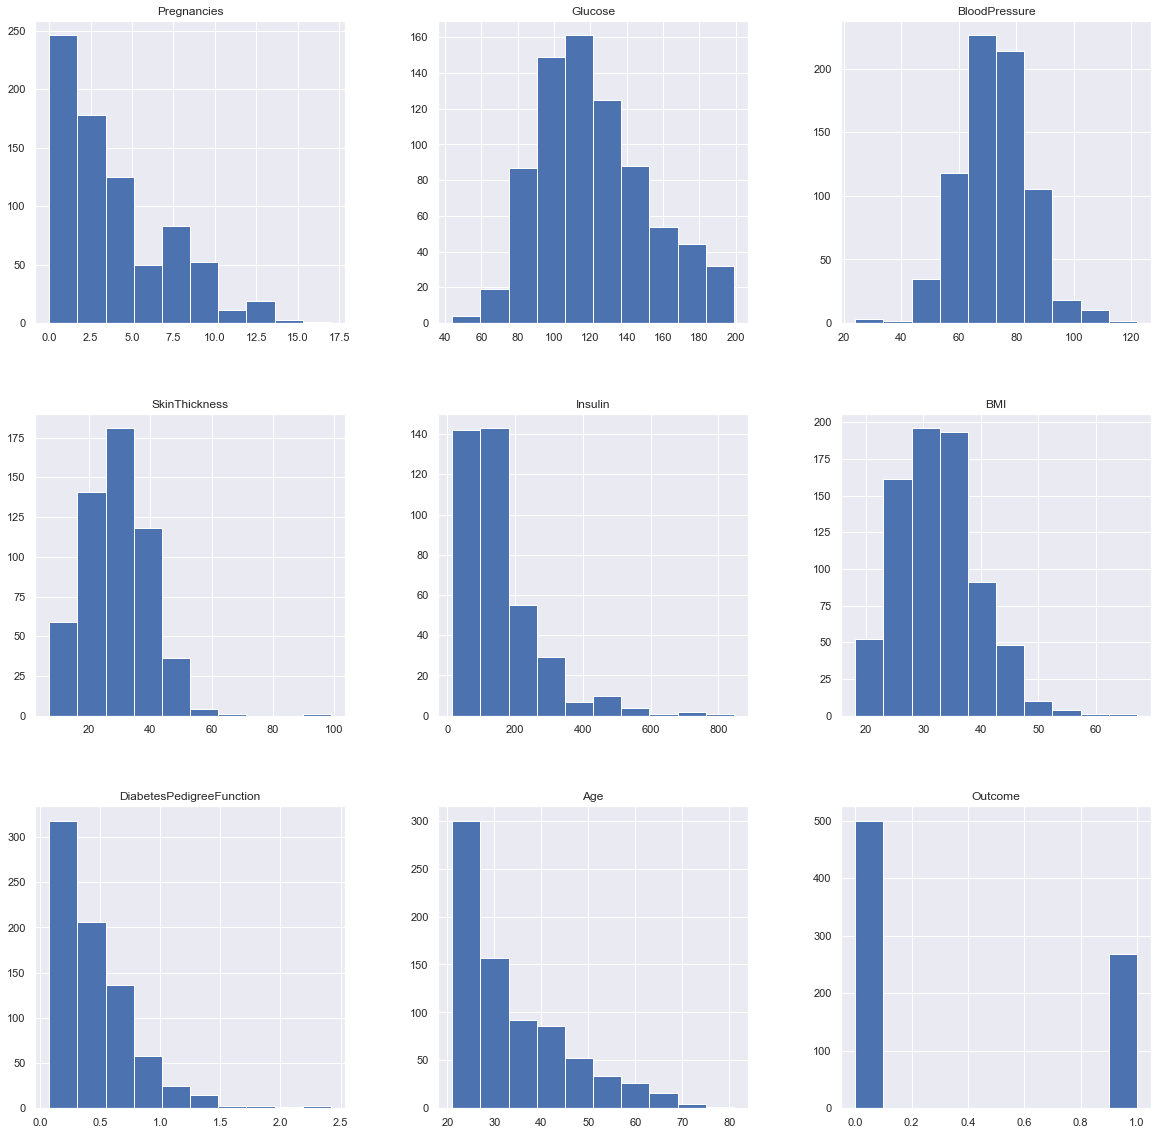

In [322]:
p = dataset.hist(figsize = (20,20))

In [323]:
# after analyzing the data distribution, we can choose proper methods to replace nan columns to meanningful value.

dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace = True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace = True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace = True)

In [324]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [325]:
# Plot again after all NAN are removed.


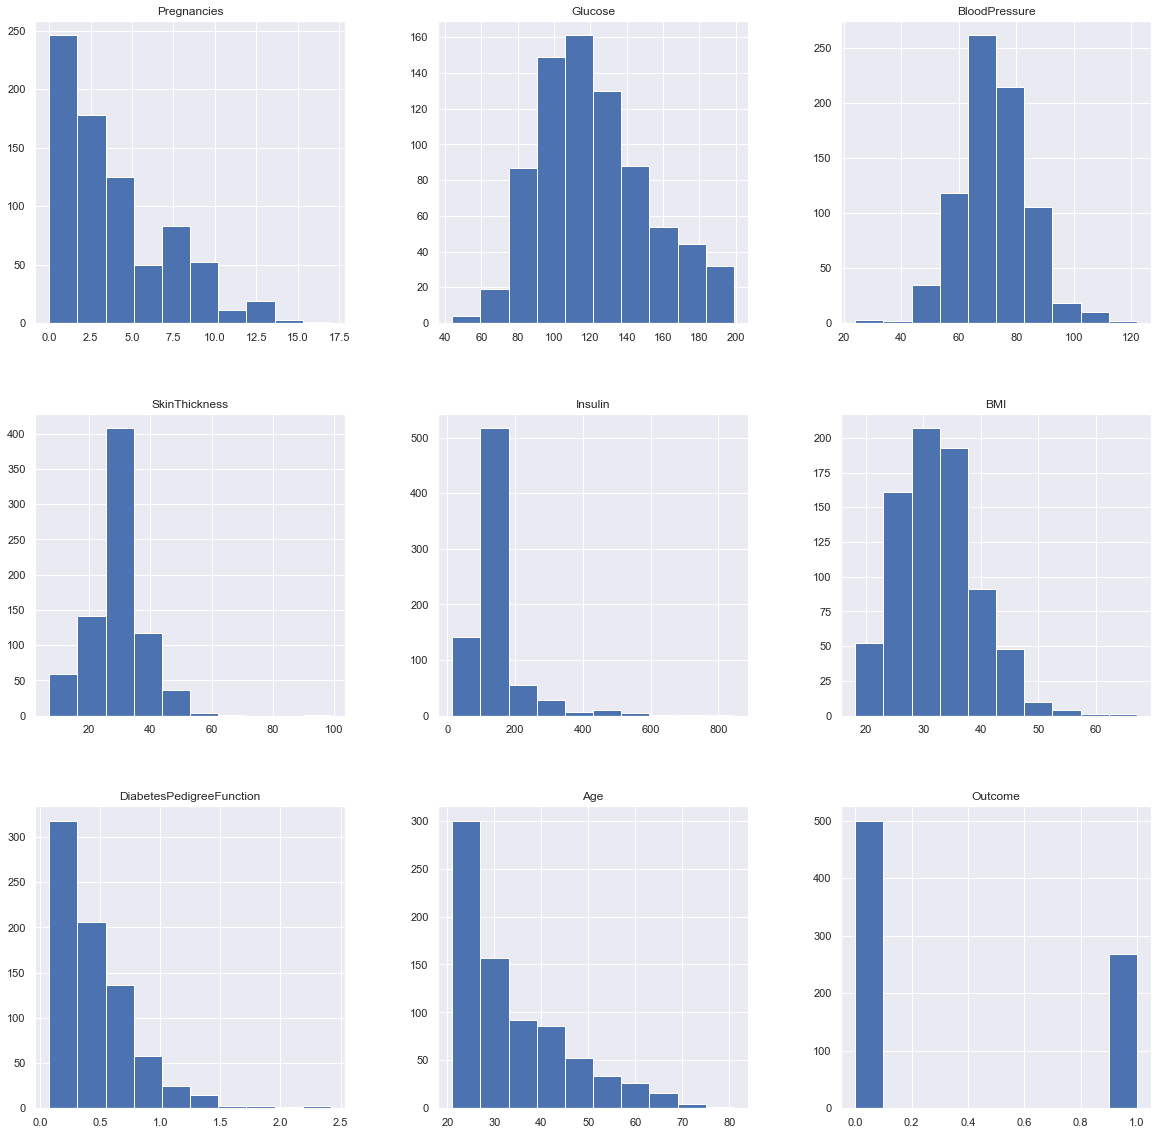

In [326]:
p = dataset.hist(figsize = (20,20))

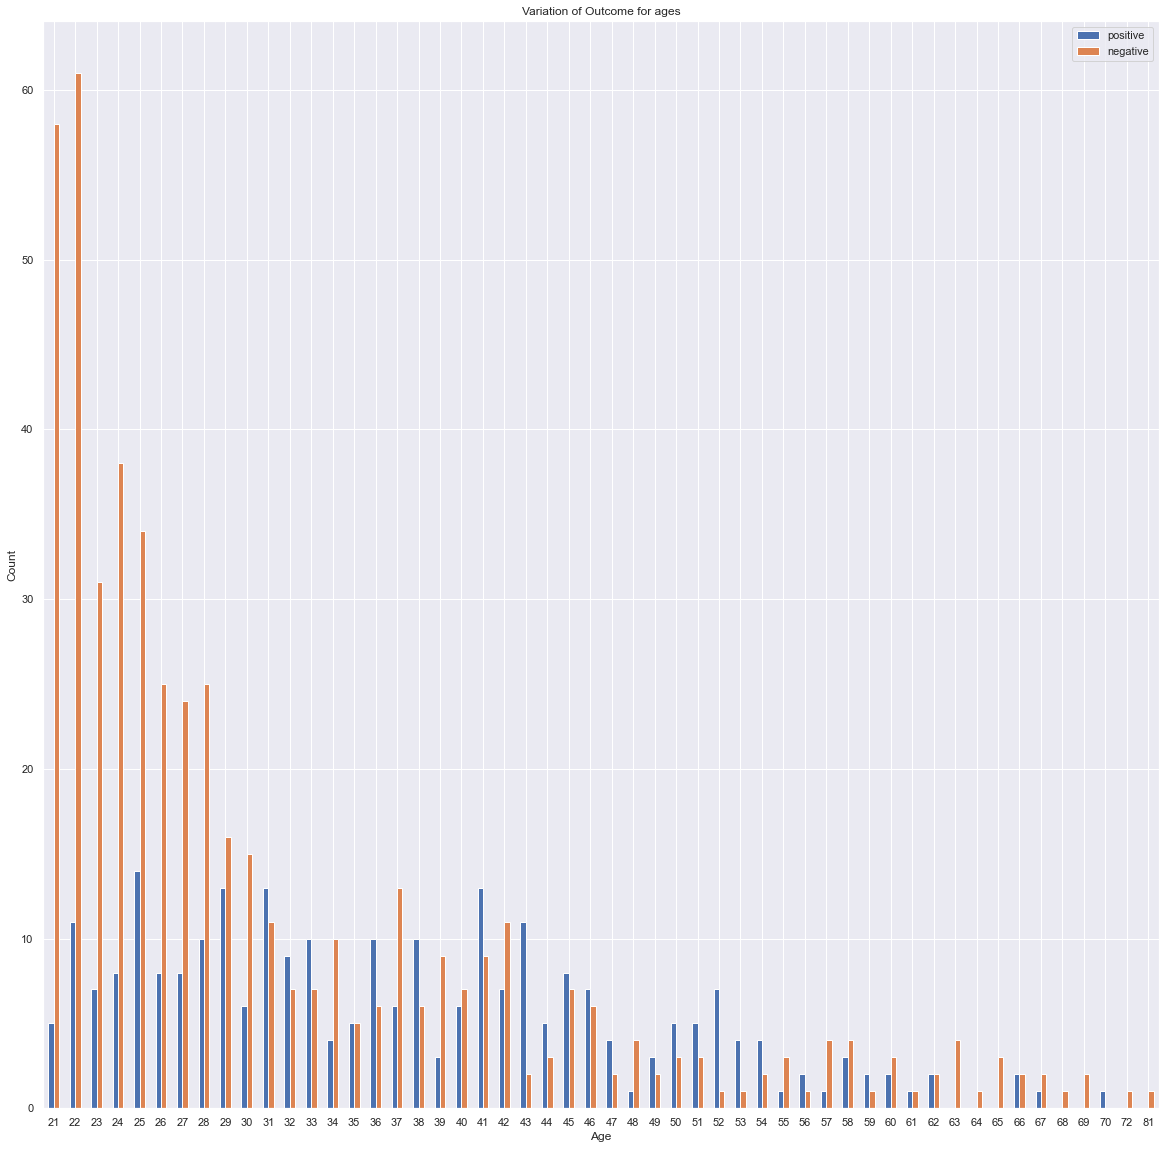

In [327]:
# 

positive = dataset.loc[dataset['Outcome'] == 1]
negative = dataset.loc[dataset['Outcome'] == 0]
number_positive_each_age = positive.groupby('Age')['Outcome'].count()
number_negative_each_age = negative.groupby('Age')['Outcome'].count()
result = pd.DataFrame(dict(positive = number_positive_each_age, negative = number_negative_each_age)).reset_index().fillna(0).set_index('Age')
result.plot.bar(figsize=[20,20])
plt.xticks(rotation=360)
plt.title('Variation of Outcome for ages')
plt.ylabel('Count')
plt.xlabel('Age');
plt.show()

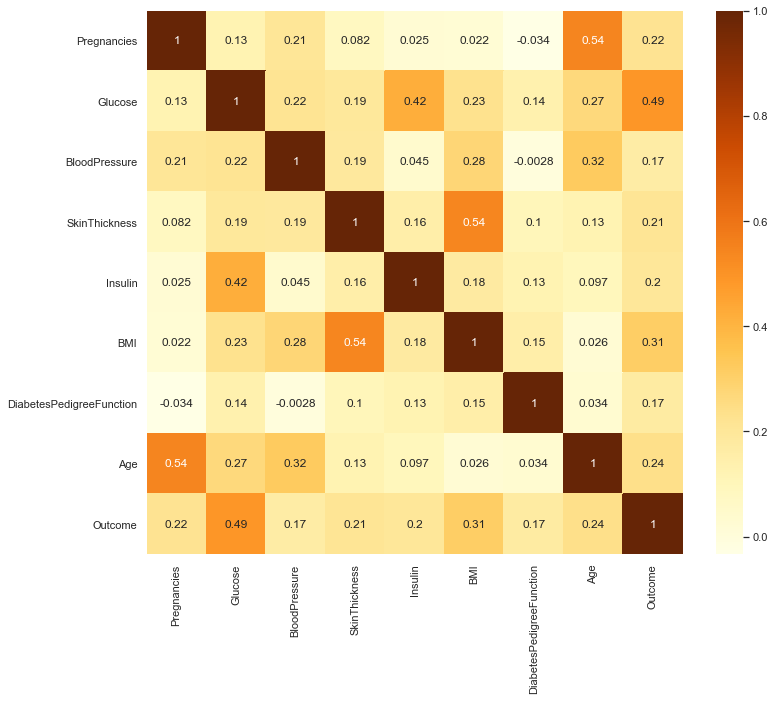

In [328]:
#heatmap
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(dataset.corr(), annot=True,cmap ='YlOrBr')

#### Analysis:
##### The value of Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation. According to the heatmap, we can clearly see the correlations between each attributes.

In [329]:
dataset.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


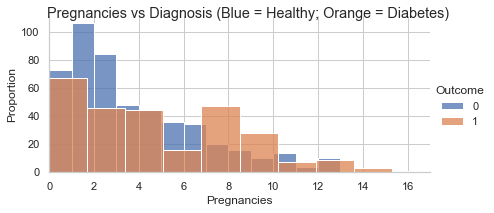

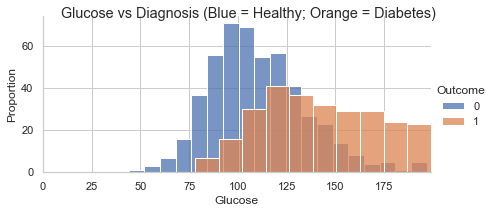

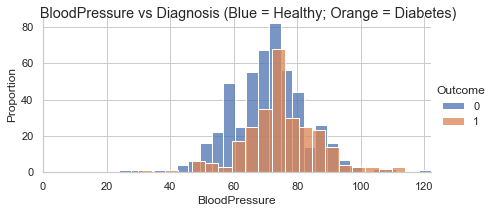

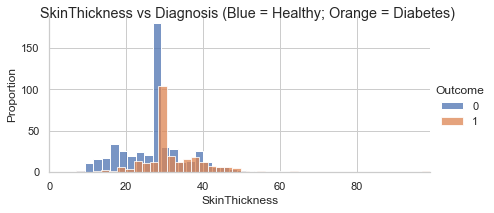

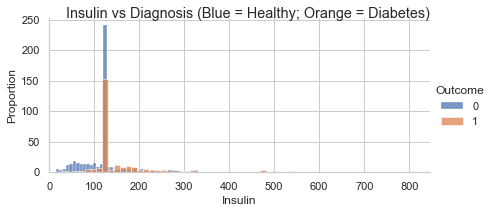

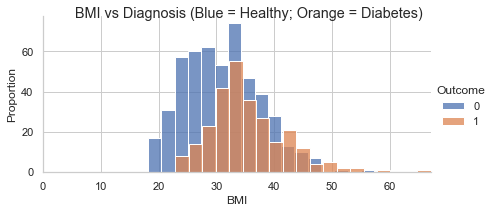

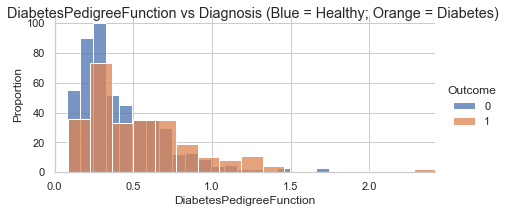

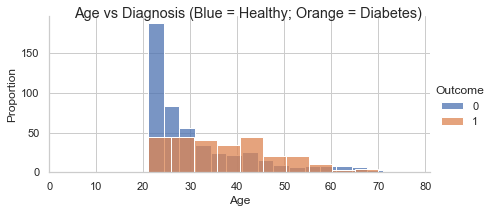

In [330]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.histplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()

    
attributes = dataset.columns.values
for i in attributes[: -1]:
    plotHistogram(dataset,"Outcome",i, i + ' vs Diagnosis (Blue = Healthy; Orange = Diabetes)')


In [331]:
def show_used_models():
    print('Decision Tree = DecisionTreeClassifier')
    print('SVC = Support Vector Machine SVC')
    print('KNN = KNeighborsClassifier')
    print('GradientBoosting = GradientBoostingClassifier')
    print('Gaussian NB = GaussianNB')
    print('Random Forest = RandomForestClassifier')
    print('Ada Boost = AdaBoostClassifier')
    print('GradientBoosting = GradientBoostingClassifier \n\n')
    
    
    

In [332]:
# modelling
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
models = []
model_names = []
results = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))

for name, model in models:
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=10)
    accuracy_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring='accuracy')
    results.append(accuracy_results)
    model_names.append(name)
    accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
    print(accuracyMessage)
  

Decision Tree: 0.677918 (0.051998)
SVC: 0.739693 (0.073575)
KNN: 0.707827 (0.070016)
GradientBoosting: 0.750559 (0.061796)
Gaussian NB: 0.769357 (0.055614)
Random Forest: 0.743291 (0.056324)
Ada Boost: 0.720825 (0.072511)


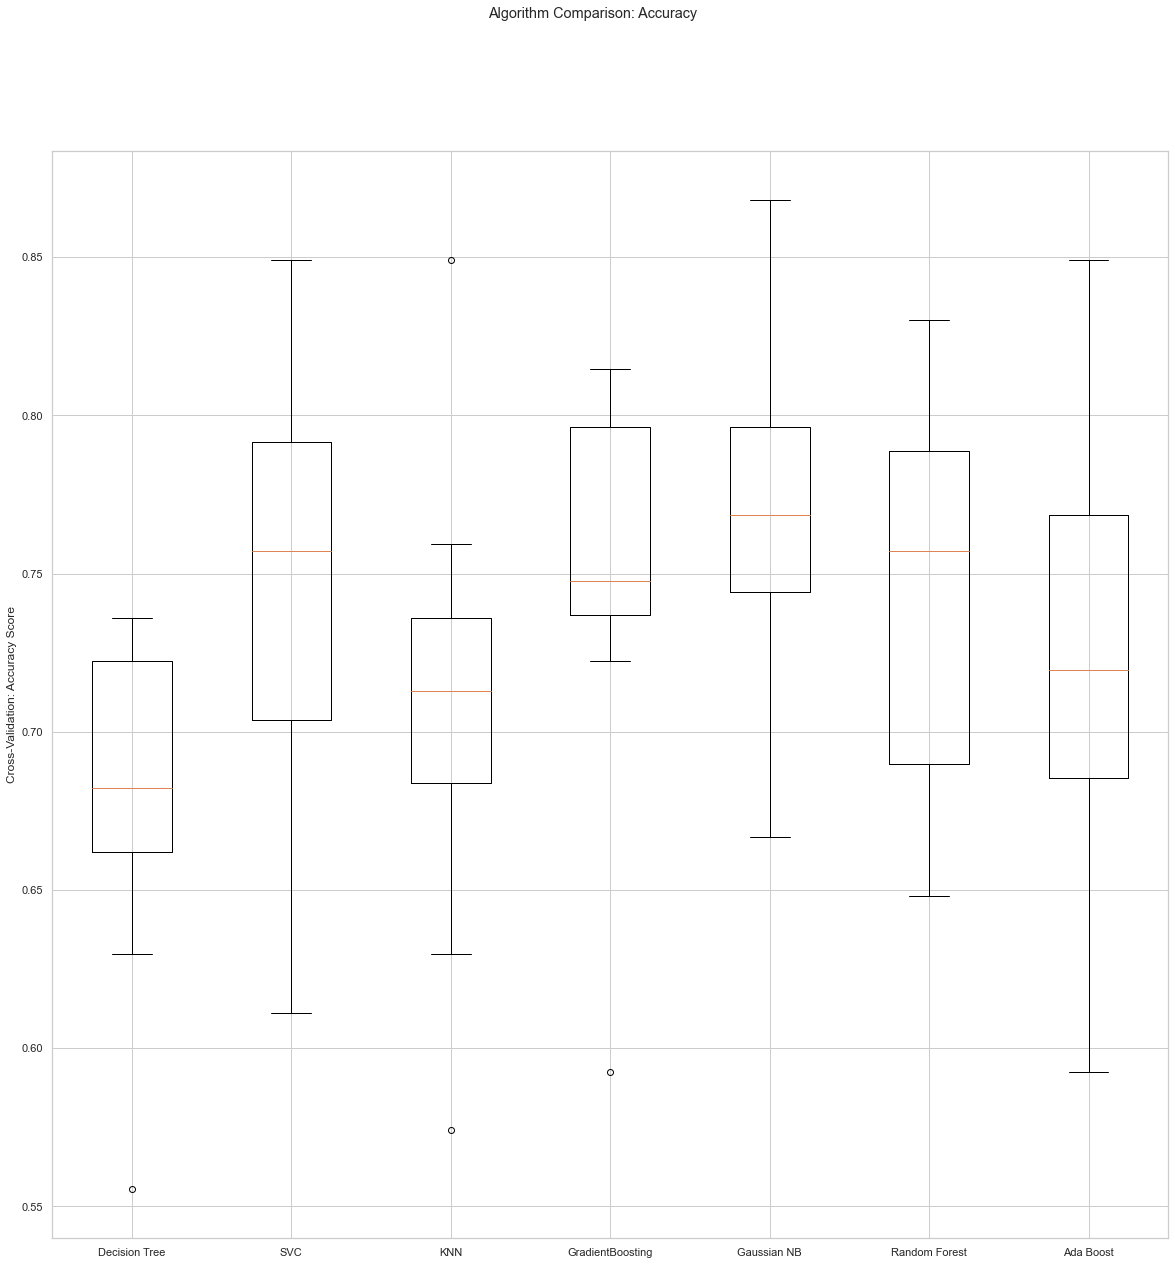

In [333]:
# boxplot for each model    
fig = plt.figure(figsize=[20,20])
fig.suptitle('Algorithm Comparison: Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
ax.set_ylabel('Cross-Validation: Accuracy Score')
plt.show()  

In [334]:
show_used_models()
results = {}
for name, clf in  models:

    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

Decision Tree = DecisionTreeClassifier
SVC = Support Vector Machine SVC
KNN = KNeighborsClassifier
GradientBoosting = GradientBoostingClassifier
Gaussian NB = GaussianNB
Random Forest = RandomForestClassifier
Ada Boost = AdaBoostClassifier
GradientBoosting = GradientBoostingClassifier 


       Decision Tree | Accuracy: 68.53% (+/- 5.50%)
                 SVC | Accuracy: 74.50% (+/- 8.48%)
                 KNN | Accuracy: 72.07% (+/- 8.25%)
    GradientBoosting | Accuracy: 73.74% (+/- 9.99%)
         Gaussian NB | Accuracy: 76.36% (+/- 4.05%)
       Random Forest | Accuracy: 73.18% (+/- 7.40%)
           Ada Boost | Accuracy: 70.96% (+/- 9.97%)


In [335]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

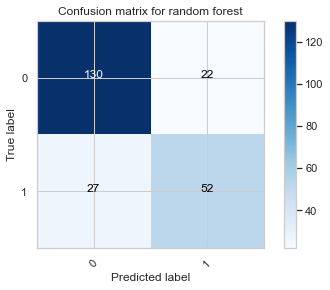

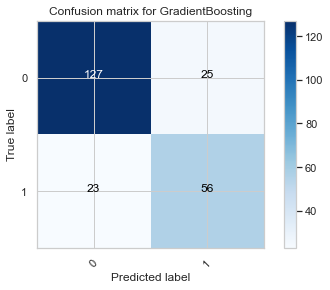

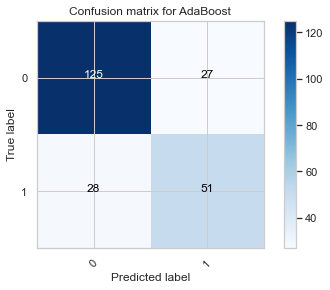

In [336]:
# according to the analysis above, we picked the top 3 high accuracy model to explore more
candidate_models = [('random forest', RandomForestClassifier()), ('GradientBoosting',GradientBoostingClassifier()), ('AdaBoost',AdaBoostClassifier())]
for name, model in candidate_models:
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=10)
    accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    prediction = model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, prediction)
    plot_confusion_matrix(cnf_matrix, classes={0:'Healthy', 1:'Diabetes'},title='Confusion matrix for '+ name)
    plt.show()

In [337]:
# ROC
def no_skill_prediction():
    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

def graph_roc_auc(model, name):
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    # calculate score
    lr_auc = roc_auc_score(y_test, lr_probs)
    # print score
    print(name + ': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(lr_fpr, lr_tpr, marker='.', label=name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()

No Skill: ROC AUC=0.500
random forest: ROC AUC=0.837
GradientBoosting: ROC AUC=0.851
AdaBoost: ROC AUC=0.818


Text(0.5, 1.0, 'ROC AUC comparison')

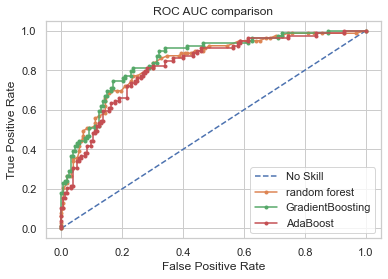

In [338]:
no_skill_prediction()
for name, model in (candidate_models):
    graph_roc_auc(model, name)
plt.title('ROC AUC comparison')

In [339]:
for name, model in candidate_models:
    model.fit(X_train, y_train)
    print('Accuracy of ' + name + ': {:.2f}'.format(model.score(X_test, y_test)))
    
    columns = dataset.columns.values
    coefficients = model.feature_importances_
    absCoefficients = abs(coefficients)
    fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
    print('DecisionTreeClassifier - Feature Importance:')
    print('\n',fullList,'\n')

Accuracy of random forest: 0.79
DecisionTreeClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.261964
5                       BMI        0.160252
7                       Age        0.129872
6  DiabetesPedigreeFunction        0.122828
0               Pregnancies        0.087502
4                   Insulin        0.085999
2             BloodPressure        0.083820
3             SkinThickness        0.067764
8                   Outcome             NaN 

Accuracy of GradientBoosting: 0.79
DecisionTreeClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.388823
5                       BMI        0.202975
7                       Age        0.103672
6  DiabetesPedigreeFunction        0.099697
0               Pregnancies        0.073492
4                   Insulin        0.073369
2             BloodPressure        0.043211
3             SkinThickness        0.014761
8

After analyzing the three models, we are able to predict diabetes from medical records with an accuracy of approximately 76%. This was done by focusing on important features such as Glucose levels and BMI. 

In [340]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [341]:
columns = ['Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction','Age', 'SkinThickness', 'Insulin']

dataset = dataset.drop(columns, axis=1)

In [342]:
dataset

,Glucose,BMI,Outcome
0,148.0,33.6,1
1,85.0,26.6,0
2,183.0,23.3,1
3,89.0,28.1,0
4,137.0,43.1,1
...,...,...,...
763,101.0,32.9,0
764,122.0,36.8,0
765,121.0,26.2,0
766,126.0,30.1,1


In [362]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print('Accuracy of GradientBoostingClassifier in Reduced Feature Space: {:.2f}'.format(clf.score(X_test, y_test)))
columns = dataset.columns
coefficients = clf.feature_importances_
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('\n GradientBoostingClassifier - Feature Importance:')
print('\n',fullList,'\n')

Accuracy of GradientBoostingClassifier in Reduced Feature Space: 0.75

 GradientBoostingClassifier - Feature Importance:

   Variable  absCoefficient
0  Glucose        0.622474
1      BMI        0.377526
2  Outcome             NaN 

